## Importing Dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

## Reading The Data

In [4]:
data = pd.read_csv('steam_top_100.csv')

In [5]:
data.head()

,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags
0,730,Counter-Strike: Global Offensive,736875,775266,21 Aug 2012,Very Positive,5993058.0,FPS:Shooter:Multiplayer:Competitive:Action:Tea...
1,570,Dota 2,580933,649690,9 Jul 2013,Very Positive,1599180.0,Free to Play:MOBA:Multiplayer:Strategy:eSports...
2,1063730,New World,243815,307146,28 Sep 2021,Mostly Positive,145931.0,Massively Multiplayer:Open World:MMORPG:Advent...
3,1172470,Apex Legends,121313,245235,4 Nov 2020,Very Positive,338236.0,Free to Play:Battle Royale:Multiplayer:Shooter...
4,440,Team Fortress 2,104477,111884,10 Oct 2007,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...


In [6]:
data.shape

(100, 8)

In [7]:
data.dtypes

,0
Steam id,int64
Game,object
Current players,int64
Peak players today,int64
Release date,object
Review summary,object
Total reviews,float64
Tags,object


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Steam id            100 non-null    int64  
 1   Game                100 non-null    object 
 2   Current players     100 non-null    int64  
 3   Peak players today  100 non-null    int64  
 4   Release date        99 non-null     object 
 5   Review summary      99 non-null     object 
 6   Total reviews       99 non-null     float64
 7   Tags                98 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [9]:
#checking the missing values
data.isnull().sum()

,0
Steam id,0
Game,0
Current players,0
Peak players today,0
Release date,1
Review summary,1
Total reviews,1
Tags,2


 ## notes:

*   Review summery change to diffrent system - encoding
*   Change release date to 'datetime' data type
*   One-Hot-Encoding to do the tags column


Review summary




## Encoding for Review summer

In [10]:
#checking the unique values of Review summary
data['Review summary'].unique()

array(['Very Positive', 'Mostly Positive', 'Mixed',
       'Overwhelmingly Positive', nan], dtype=object)

In [11]:
#categorize this variable
data['Review summary'] = pd.Categorical(data['Review summary'], ['Very Positive','Mostly Positive','Mixed','Overwhelmingly Positive'], ordered = True)

In [12]:
data['Review summary'].unique()

['Very Positive', 'Mostly Positive', 'Mixed', 'Overwhelmingly Positive', NaN]
Categories (4, object): ['Very Positive' < 'Mostly Positive' < 'Mixed' < 'Overwhelmingly Positive']

break

In [13]:
data['Review summary encoded'] = data['Review summary'].cat.codes

In [14]:
data['Review summary encoded'].unique()

array([ 0,  1,  2,  3, -1], dtype=int8)

In [15]:
data['Review summary'].unique()

['Very Positive', 'Mostly Positive', 'Mixed', 'Overwhelmingly Positive', NaN]
Categories (4, object): ['Very Positive' < 'Mostly Positive' < 'Mixed' < 'Overwhelmingly Positive']

In [16]:
data.at[7,'Game']

'MIR4'

In [17]:
data.at[7,'Review summary']

'Mixed'

In [18]:
data.at[7,'Review summary encoded']

np.int8(2)

In [19]:
data.head()

,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags,Review summary encoded
0,730,Counter-Strike: Global Offensive,736875,775266,21 Aug 2012,Very Positive,5993058.0,FPS:Shooter:Multiplayer:Competitive:Action:Tea...,0
1,570,Dota 2,580933,649690,9 Jul 2013,Very Positive,1599180.0,Free to Play:MOBA:Multiplayer:Strategy:eSports...,0
2,1063730,New World,243815,307146,28 Sep 2021,Mostly Positive,145931.0,Massively Multiplayer:Open World:MMORPG:Advent...,1
3,1172470,Apex Legends,121313,245235,4 Nov 2020,Very Positive,338236.0,Free to Play:Battle Royale:Multiplayer:Shooter...,0
4,440,Team Fortress 2,104477,111884,10 Oct 2007,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...,0


In [20]:
data.tail()

,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags,Review summary encoded
95,1286830,STAR WARS™: The Old Republic™,7104,9345,21 Jul 2020,Very Positive,33098.0,Free to Play:MMORPG:Character Customization:Mu...,0
96,1644960,NBA 2K22,7020,13139,9 Sep 2021,Mixed,6266.0,Sports:Basketball:Simulation:eSports:Realistic...,2
97,244210,Assetto Corsa,6965,8707,19 Dec 2014,Very Positive,42497.0,Racing:Automobile Sim:Simulation:Driving:Reali...,0
98,275850,No Man's Sky,6963,10122,12 Aug 2016,Mostly Positive,168792.0,Open World:Open World Survival Craft:Space:Exp...,1
99,1238810,Battlefield™ V,6724,33310,22 Oct 2020,Mostly Positive,68109.0,FPS:World War II:Shooter:Multiplayer:War:Singl...,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Steam id                100 non-null    int64   
 1   Game                    100 non-null    object  
 2   Current players         100 non-null    int64   
 3   Peak players today      100 non-null    int64   
 4   Release date            99 non-null     object  
 5   Review summary          99 non-null     category
 6   Total reviews           99 non-null     float64 
 7   Tags                    98 non-null     object  
 8   Review summary encoded  100 non-null    int8    
dtypes: category(1), float64(1), int64(3), int8(1), object(3)
memory usage: 6.0+ KB


replacing missing value

In [22]:
data['Review summary'].mode()

,Review summary
0,Very Positive


'Very Positive' turn out to be the mode in this variable.

In [23]:
mode_value = data['Review summary'].mode()[0]

data['Review summary'].fillna(mode_value, inplace=True)

/tmp/ipython-input-1653210173.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Review summary'].fillna(mode_value, inplace=True)


In [24]:
#checking the missing values
data.isnull().sum()

,0
Steam id,0
Game,0
Current players,0
Peak players today,0
Release date,1
Review summary,0
Total reviews,1
Tags,2
Review summary encoded,0


## Change data type for 'datetime'


*   Changing release date variable to datetime datatype.
*   Make new column just for release year.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Steam id                100 non-null    int64   
 1   Game                    100 non-null    object  
 2   Current players         100 non-null    int64   
 3   Peak players today      100 non-null    int64   
 4   Release date            99 non-null     object  
 5   Review summary          100 non-null    category
 6   Total reviews           99 non-null     float64 
 7   Tags                    98 non-null     object  
 8   Review summary encoded  100 non-null    int8    
dtypes: category(1), float64(1), int64(3), int8(1), object(3)
memory usage: 6.0+ KB


In [26]:
data.head()

,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags,Review summary encoded
0,730,Counter-Strike: Global Offensive,736875,775266,21 Aug 2012,Very Positive,5993058.0,FPS:Shooter:Multiplayer:Competitive:Action:Tea...,0
1,570,Dota 2,580933,649690,9 Jul 2013,Very Positive,1599180.0,Free to Play:MOBA:Multiplayer:Strategy:eSports...,0
2,1063730,New World,243815,307146,28 Sep 2021,Mostly Positive,145931.0,Massively Multiplayer:Open World:MMORPG:Advent...,1
3,1172470,Apex Legends,121313,245235,4 Nov 2020,Very Positive,338236.0,Free to Play:Battle Royale:Multiplayer:Shooter...,0
4,440,Team Fortress 2,104477,111884,10 Oct 2007,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...,0


In [27]:
data['Release date'] = data['Release date'].replace("Nov 2018", "01 Nov 2018")
data['Release date'] = pd.to_datetime(data['Release date'], errors='coerce')

In [28]:
data.isnull().sum()

,0
Steam id,0
Game,0
Current players,0
Peak players today,0
Release date,1
Review summary,0
Total reviews,1
Tags,2
Review summary encoded,0


In [29]:
data.head()

,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags,Review summary encoded
0,730,Counter-Strike: Global Offensive,736875,775266,2012-08-21,Very Positive,5993058.0,FPS:Shooter:Multiplayer:Competitive:Action:Tea...,0
1,570,Dota 2,580933,649690,2013-07-09,Very Positive,1599180.0,Free to Play:MOBA:Multiplayer:Strategy:eSports...,0
2,1063730,New World,243815,307146,2021-09-28,Mostly Positive,145931.0,Massively Multiplayer:Open World:MMORPG:Advent...,1
3,1172470,Apex Legends,121313,245235,2020-11-04,Very Positive,338236.0,Free to Play:Battle Royale:Multiplayer:Shooter...,0
4,440,Team Fortress 2,104477,111884,2007-10-10,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...,0


In [30]:
data[data['Release date'].isnull()]

,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags,Review summary encoded
38,480,Spacewar,22827,26884,NaT,Very Positive,NaN,NaN,-1


In [31]:
data.isnull().sum()

,0
Steam id,0
Game,0
Current players,0
Peak players today,0
Release date,1
Review summary,0
Total reviews,1
Tags,2
Review summary encoded,0


making a new cloumn for Release Year

In [32]:
data['Release Year'] = data['Release date'].dt.year

In [33]:
data.head()

,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags,Review summary encoded,Release Year
0,730,Counter-Strike: Global Offensive,736875,775266,2012-08-21,Very Positive,5993058.0,FPS:Shooter:Multiplayer:Competitive:Action:Tea...,0,2012.0
1,570,Dota 2,580933,649690,2013-07-09,Very Positive,1599180.0,Free to Play:MOBA:Multiplayer:Strategy:eSports...,0,2013.0
2,1063730,New World,243815,307146,2021-09-28,Mostly Positive,145931.0,Massively Multiplayer:Open World:MMORPG:Advent...,1,2021.0
3,1172470,Apex Legends,121313,245235,2020-11-04,Very Positive,338236.0,Free to Play:Battle Royale:Multiplayer:Shooter...,0,2020.0
4,440,Team Fortress 2,104477,111884,2007-10-10,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...,0,2007.0


## Total Reviews



*   Getting rid of null values in total reviews.
*   Also changing data type to int.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Steam id                100 non-null    int64         
 1   Game                    100 non-null    object        
 2   Current players         100 non-null    int64         
 3   Peak players today      100 non-null    int64         
 4   Release date            99 non-null     datetime64[ns]
 5   Review summary          100 non-null    category      
 6   Total reviews           99 non-null     float64       
 7   Tags                    98 non-null     object        
 8   Review summary encoded  100 non-null    int8          
 9   Release Year            99 non-null     float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), int8(1), object(2)
memory usage: 6.8+ KB


In [35]:
data = data.fillna(value={'Total reviews':data['Total reviews'].median()})

In [36]:
data['Total reviews'] = data['Total reviews'].astype('int')

In [37]:
data.isnull().sum()

,0
Steam id,0
Game,0
Current players,0
Peak players today,0
Release date,1
Review summary,0
Total reviews,0
Tags,2
Review summary encoded,0
Release Year,1


In [38]:
name = ['Steam id','Game','Current players','Peak players today','Release date','Release Year','Review summary','Review summary encoded','Total reviews','Tags']
data = data.reindex(columns = name)

In [39]:
data.head()

,Steam id,Game,Current players,Peak players today,Release date,Release Year,Review summary,Review summary encoded,Total reviews,Tags
0,730,Counter-Strike: Global Offensive,736875,775266,2012-08-21,2012.0,Very Positive,0,5993058,FPS:Shooter:Multiplayer:Competitive:Action:Tea...
1,570,Dota 2,580933,649690,2013-07-09,2013.0,Very Positive,0,1599180,Free to Play:MOBA:Multiplayer:Strategy:eSports...
2,1063730,New World,243815,307146,2021-09-28,2021.0,Mostly Positive,1,145931,Massively Multiplayer:Open World:MMORPG:Advent...
3,1172470,Apex Legends,121313,245235,2020-11-04,2020.0,Very Positive,0,338236,Free to Play:Battle Royale:Multiplayer:Shooter...
4,440,Team Fortress 2,104477,111884,2007-10-10,2007.0,Very Positive,0,821568,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...


## EDA

top 10 games according to Current players

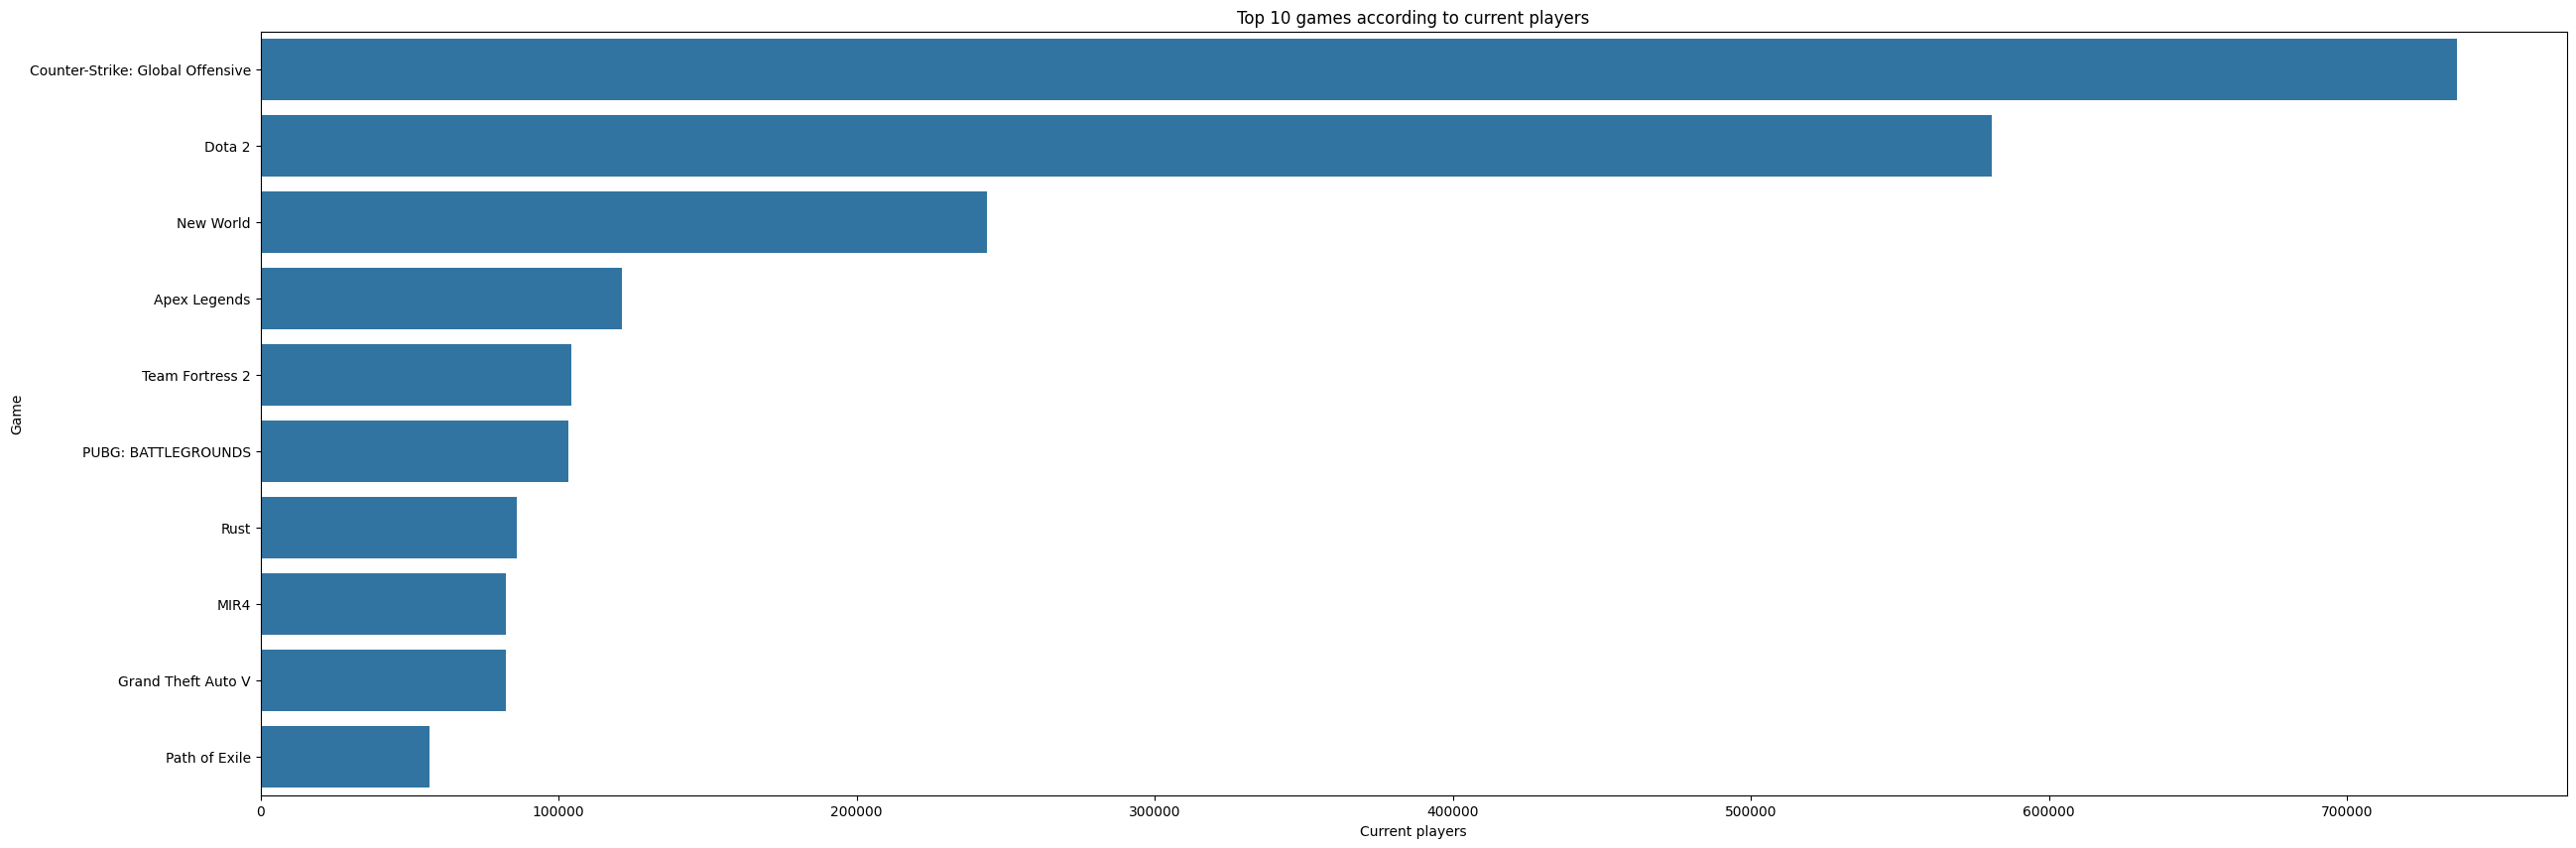

In [40]:
top = data.sort_values('Current players', ascending=False).head(10)
plt.figure(figsize=(30,10))
sns.barplot(x = top['Current players'], y = top.Game)
plt.title('Top 10 games according to current players')
plt.show()

top 10 games according to Peak players Today

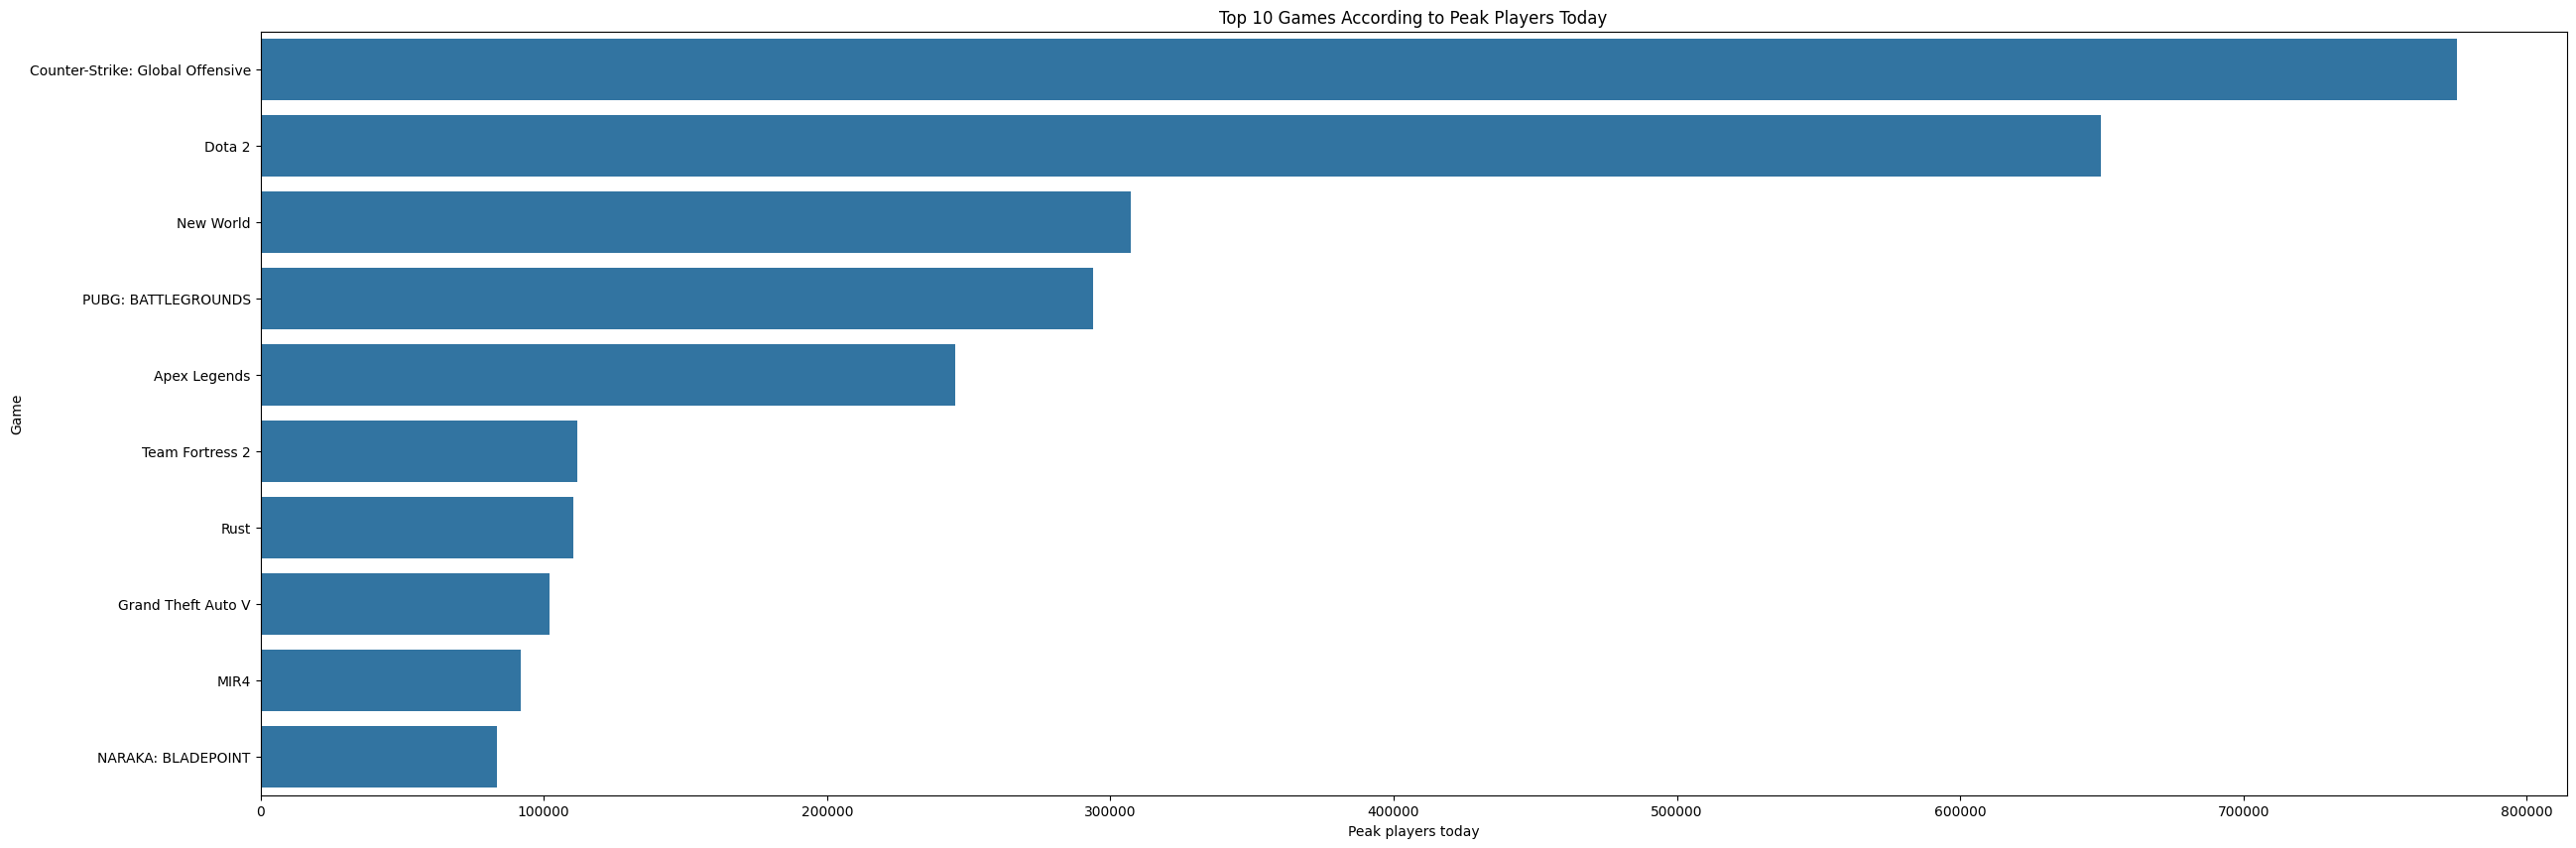

In [41]:
top = data.sort_values('Peak players today', ascending=False). head(10)
plt.figure(figsize= (30,10))
sns.barplot(x = top['Peak players today'], y = top.Game)
plt.title('Top 10 Games According to Peak Players Today')
plt.show()

 Oldest Release

In [42]:
display(data.sort_values('Release date', ascending=True)[0:1])

,Steam id,Game,Current players,Peak players today,Release date,Release Year,Review summary,Review summary encoded,Total reviews,Tags
55,10,Counter-Strike,15244,15752,2000-11-01,2000.0,Overwhelmingly Positive,3,111163,Action:FPS:Multiplayer:Shooter:Classic:Team-Ba...


Newest Release

In [43]:
display(data.sort_values('Release date', ascending=False)[0:1])

,Steam id,Game,Current players,Peak players today,Release date,Release Year,Review summary,Review summary encoded,Total reviews,Tags
18,1569040,Football Manager 2022,40936,44497,2021-11-09,2021.0,Very Positive,0,1942,Sports:Management:Real Time Tactics:Soccer:Sim...


Top 10 Highest Number of Reviews

In [44]:
top = data.sort_values('Total reviews', ascending=False).head(10)
print(top[['Game','Total reviews']])

                                Game  Total reviews
0   Counter-Strike: Global Offensive        5993058
1                             Dota 2        1599180
5                PUBG: BATTLEGROUNDS        1530629
8                 Grand Theft Auto V        1102837
17    Tom Clancy's Rainbow Six Siege         831791
4                    Team Fortress 2         821568
31                          Terraria         657407
30                       Garry's Mod         640525
6                               Rust         554535
47          The Witcher 3: Wild Hunt         514840


Top 10 Lowest number of reviews

In [45]:
top = data.sort_values('Total reviews', ascending= True).head(10)
print(top[['Game','Total reviews']])

                                  Game  Total reviews
13     Lost Ark Closed Technical Beta            1433
18               Football Manager 2022           1942
7                                 MIR4           5344
96                            NBA 2K22           6266
19                             FIFA 22           8969
77                             F1 2021           9492
94  Pathfinder: Wrath of the Righteous           9550
20                   Age of Empires IV           9709
80                        Back 4 Blood          12960
33               Football Manager 2021          13031


Average Current players

In [46]:
data['Current players'].describe()

,Current players
count,100.000000
mean,39954.370000
std,94808.092861
min,6724.000000
25%,10018.500000
50%,18012.000000
75%,32333.500000
max,736875.000000


Text(0.5, 1.0, 'Current players')

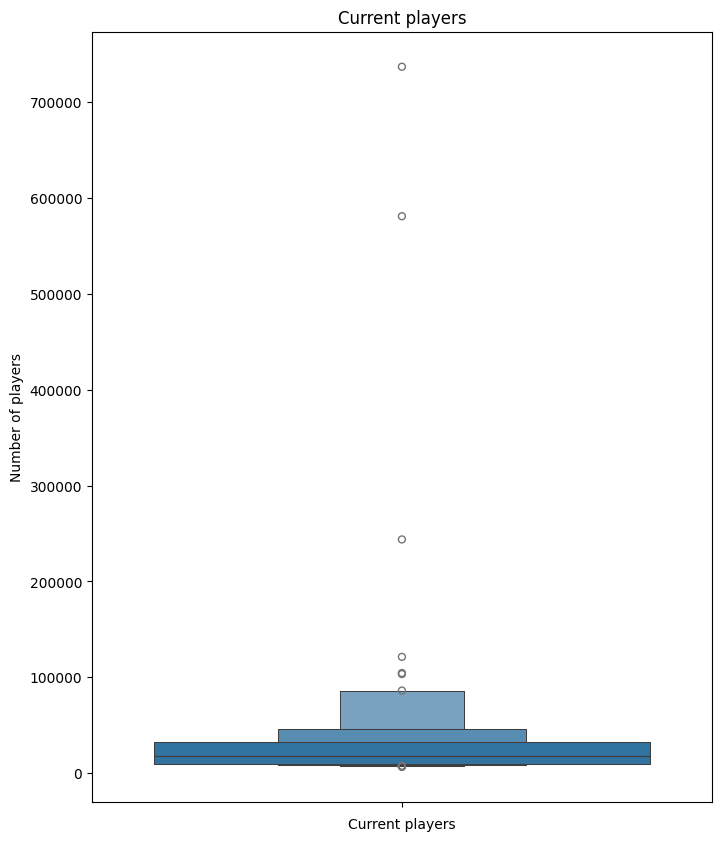

In [47]:
plt.figure(figsize=(8,10))
sns.boxenplot(data = data['Current players'])
plt.ylabel('Number of players')
plt.xlabel('Current players')
plt.title('Current players')

Average number of players in a day.

In [48]:
data['Peak players today'].describe()

,Peak players today
count,100.000000
mean,52364.190000
std,106888.744819
min,8707.000000
25%,15032.750000
50%,24493.000000
75%,43076.000000
max,775266.000000


Text(0.5, 0, 'Peak players Today')

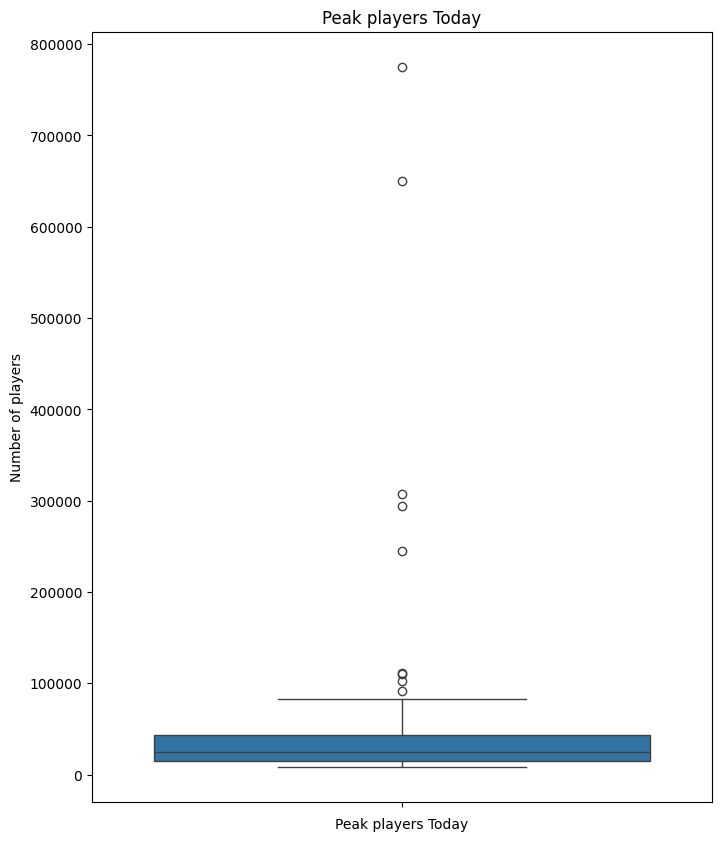

In [49]:
plt.figure(figsize=(8,10))
sns.boxplot(data = data['Peak players today'])
plt.title('Peak players Today')
plt.ylabel('Number of players')
plt.xlabel('Peak players Today')


 most common review by the player

In [50]:
rev = data['Review summary'].value_counts()
print(rev)

Review summary
Very Positive              59
Overwhelmingly Positive    25
Mostly Positive            12
Mixed                       4
Name: count, dtype: int64


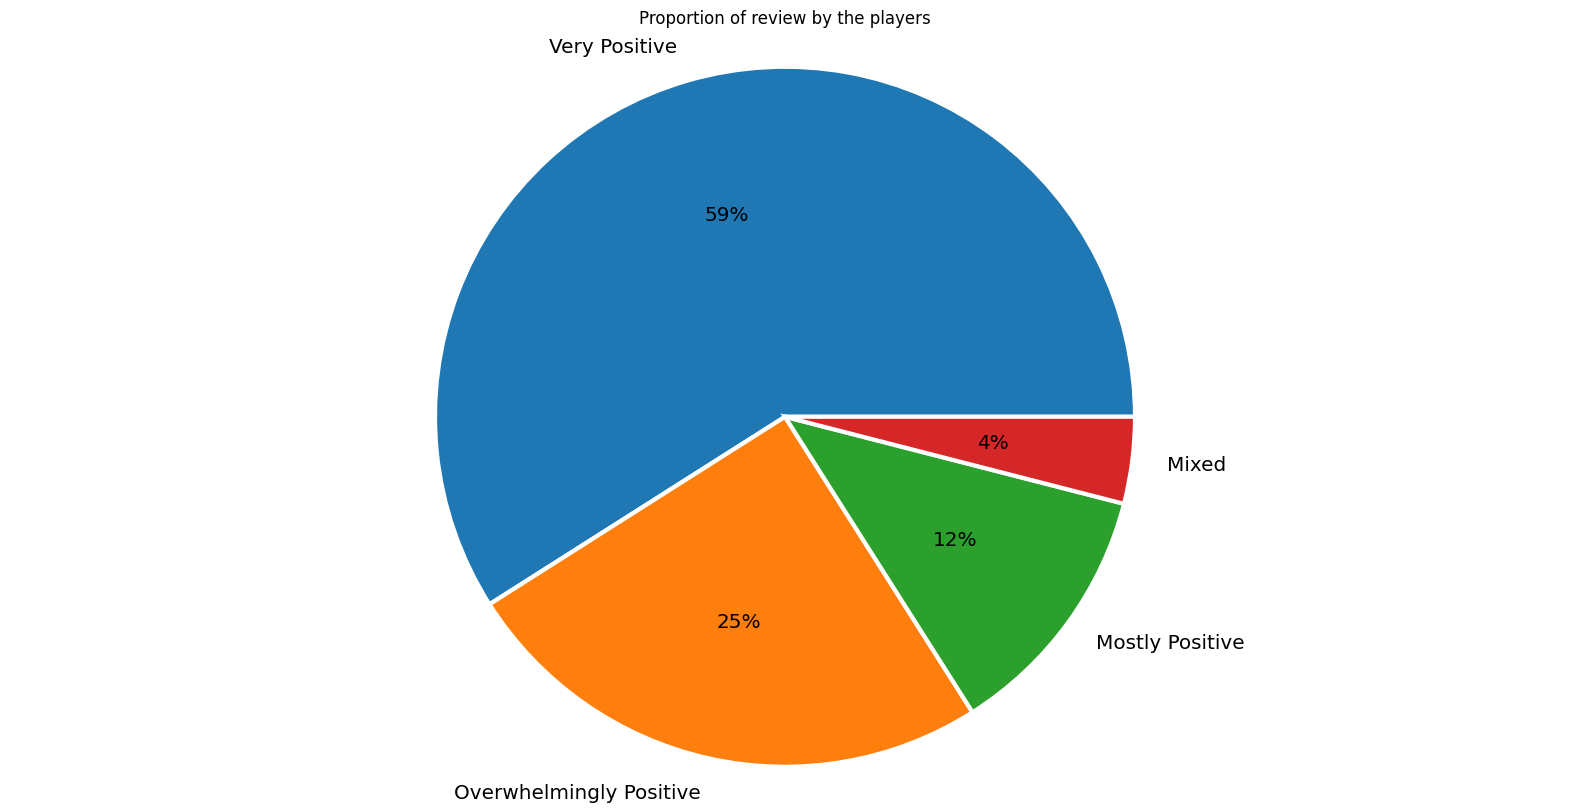

In [51]:
plt.figure(figsize=(20,10))
plt.pie(rev, labels= rev.index,autopct='%.0f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'x-large'})
plt.title('Proportion of review by the players')
plt.axis('equal')
plt.show()

which year had the most games released

In [52]:
print(data['Release Year'].unique())
year = data['Release Year'].value_counts()
print(year)

[2012. 2013. 2021. 2020. 2007. 2017. 2018. 2015. 2016. 2019. 2014. 2006.
 2011.   nan 2010. 2000. 2009.]
Release Year
2020.0    18
2021.0    16
2018.0    11
2017.0    11
2016.0    10
2015.0     8
2013.0     8
2019.0     5
2014.0     4
2012.0     2
2007.0     1
2006.0     1
2011.0     1
2010.0     1
2000.0     1
2009.0     1
Name: count, dtype: int64


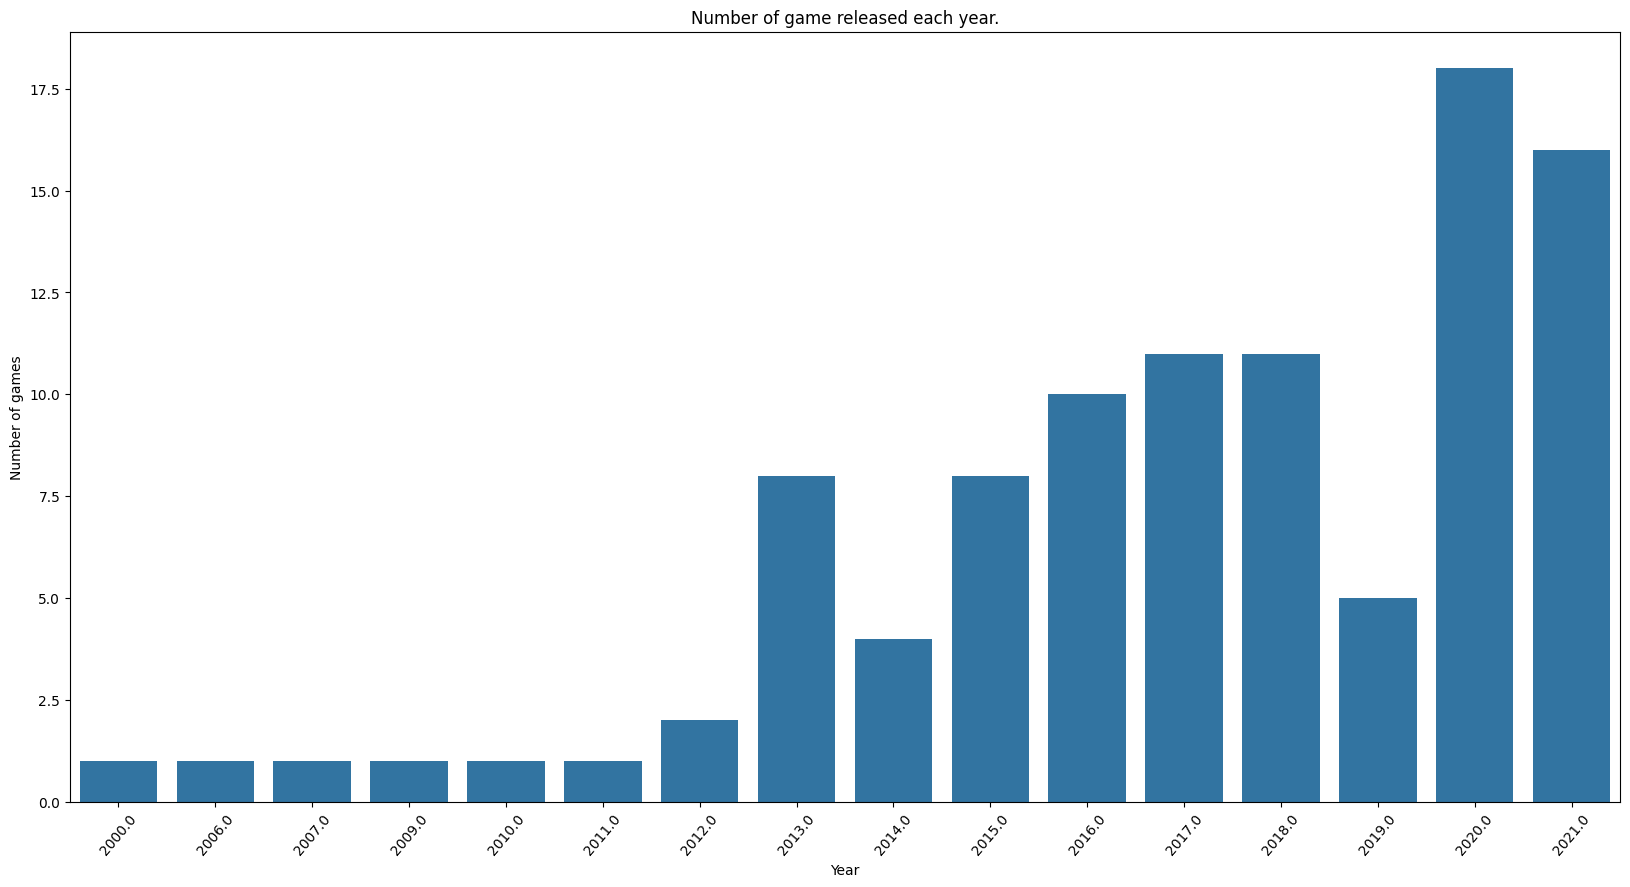

In [53]:
plt.figure(figsize=(20,10))
sns.barplot(x= year.index ,y = year)
plt.xticks(rotation=50)
plt.title('Number of game released each year.')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.show()